## I. Perkenalan

Nama : Arya Bandoro
FTDS Batch -004

## II. Import Pustaka Yang Dibutuhkan 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## III. Data Loading

Kita dapat melakukan loading data dengan cara sebagai berikut ini

In [4]:
data_awal = pd.read_csv(r'C:\Users\Acer\OneDrive\Documents\Hacktiv8\Phase 1\Week 1\Graded Challenge\weatherAUS.csv')

Kita dapat mencari/melakukan eksplorasi data dengan sederhana, dengan menjalankan perintah sebagai berikut ini

In [5]:
data_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data_awal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## IV. Data Cleaning

Kita dapat melakukann pembersihan data dengan cara sebagai berikut ini

In [7]:
data_awal # kita perlu untuk melihat data tersebut secara lebih dalam lagi

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Kita perlu melihat apakah terdapat data yang jelek/data kosong dengan cara berikut ini

In [8]:
data_awal.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
data_awal['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


Disini saya akan membuat prediksi model dengan mengambil beberapa parameter diantaranya adalah Windspeed, humidity, dan temperatur, dimana dapat dibuat menjadi sebagai berikut ini 

In [10]:
data_filter = data_awal[['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']]

In [11]:
data_filter

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...
145455,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,9.0,9.0,53.0,24.0,12.5,26.1,No,No
145458,13.0,7.0,51.0,24.0,15.1,26.0,No,No


In [12]:
data_filter.isna().sum()

WindSpeed9am    1767
WindSpeed3pm    3062
Humidity9am     2654
Humidity3pm     4507
Temp9am         1767
Temp3pm         3609
RainToday       3261
RainTomorrow    3267
dtype: int64

In [13]:
(4507/145460)*100

3.09844630826344

Karena data yang tidak berisi hanya 3 % dan dibawah batas 15% maka dapat kita hilangkan dengan cara sebagai berikut ini

In [14]:
databersih = data_filter[['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']]

In [15]:
databersih

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...
145455,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,9.0,9.0,53.0,24.0,12.5,26.1,No,No
145458,13.0,7.0,51.0,24.0,15.1,26.0,No,No


Kita dapat melihat missing values kembali dengan cara sebagai berikut ini

In [16]:
databersihfix = databersih.dropna(how='any',axis=0)

## V. Data Exploration

In [17]:
databersihfix

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...
145454,15.0,13.0,59.0,27.0,9.4,20.9,No,No
145455,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,9.0,9.0,53.0,24.0,12.5,26.1,No,No


In [18]:
databersihfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135915 entries, 0 to 145458
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   WindSpeed9am  135915 non-null  float64
 1   WindSpeed3pm  135915 non-null  float64
 2   Humidity9am   135915 non-null  float64
 3   Humidity3pm   135915 non-null  float64
 4   Temp9am       135915 non-null  float64
 5   Temp3pm       135915 non-null  float64
 6   RainToday     135915 non-null  object 
 7   RainTomorrow  135915 non-null  object 
dtypes: float64(6), object(2)
memory usage: 9.3+ MB


In [19]:
databersihfix.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WindSpeed9am,135915.0,14.037766,8.854911,0.0,7.0,13.0,19.0,87.0
WindSpeed3pm,135915.0,18.666137,8.812367,0.0,13.0,19.0,24.0,87.0
Humidity9am,135915.0,68.783732,19.105028,0.0,57.0,70.0,83.0,100.0
Humidity3pm,135915.0,51.397822,20.780122,0.0,36.0,52.0,66.0,100.0
Temp9am,135915.0,16.947915,6.474340,-7.2,12.2,16.7,21.5,40.2
Temp3pm,135915.0,21.718384,6.920412,-5.4,16.6,21.1,26.5,46.7


Selanjutnya Dapat Kita Cek Kemungkinan Outliersnya Dengan cara sebagai berikut ini

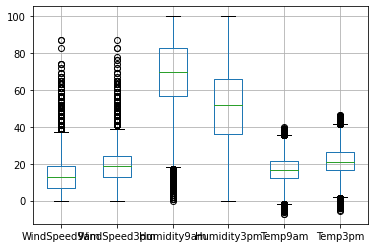

In [20]:
databersihfix.boxplot()
plt.show()

Lalu dapat kita cari juga dengan cara visualisasi data yang lain

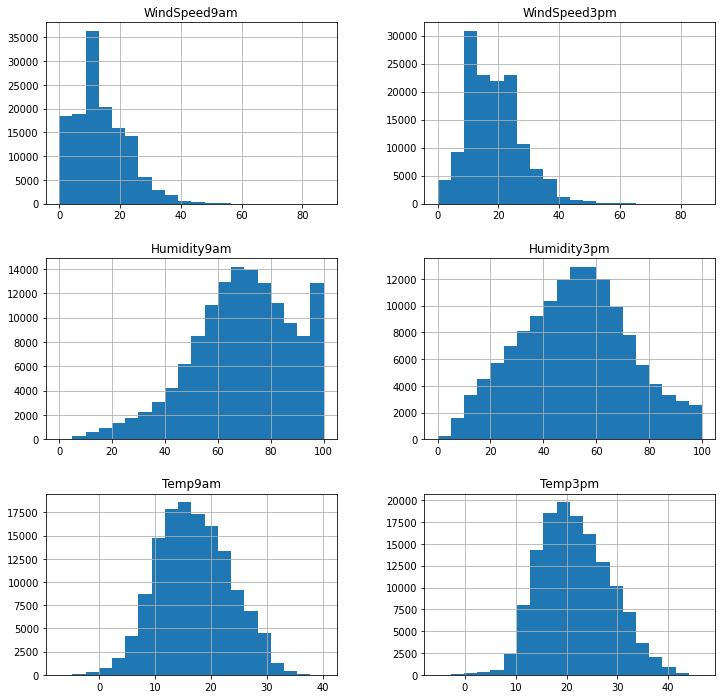

In [21]:
databersihfix.hist(figsize=(12,12),bins=20)
plt.show()

## VI. Data Preprocessing

Selanjutnya adalah kita melakukan data preprocessing dengan cara sebagai berikut ini

In [22]:
encode = {'No': 0, 'Yes': 1}

databersihfix['RainToday'].replace(encode, inplace=True)
databersihfix['RainTomorrow'].replace(encode, inplace=True)

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
databersihfix

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,7.0,20.0,82.0,33.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...
145454,15.0,13.0,59.0,27.0,9.4,20.9,0,0
145455,13.0,11.0,51.0,24.0,10.1,22.4,0,0
145456,13.0,9.0,56.0,21.0,10.9,24.5,0,0
145457,9.0,9.0,53.0,24.0,12.5,26.1,0,0


In [24]:
#selanjutnya kita dapat mencari korelasi dengan perintah sebagai berikut ini
plt.figure(figsize=(10,10))
korelasi = databersihfix.corr()
korelasi

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
WindSpeed9am,1.000000,0.520221,-0.272071,-0.032168,0.133739,0.003881,0.102814,0.089571
WindSpeed3pm,0.520221,1.000000,-0.146453,0.017277,0.168489,0.027774,0.081193,0.087051
Humidity9am,-0.272071,-0.146453,1.000000,0.668745,-0.478695,-0.501492,0.352941,0.256707
Humidity3pm,-0.032168,0.017277,0.668745,1.000000,-0.223973,-0.558479,0.378391,0.447947
Temp9am,0.133739,0.168489,-0.478695,-0.223973,1.000000,0.860716,-0.096279,-0.024428
Temp3pm,0.003881,0.027774,-0.501492,-0.558479,0.860716,1.000000,-0.234008,-0.191962
RainToday,0.102814,0.081193,0.352941,0.378391,-0.096279,-0.234008,1.000000,0.311088
RainTomorrow,0.089571,0.087051,0.256707,0.447947,-0.024428,-0.191962,0.311088,1.000000


<Figure size 720x720 with 0 Axes>

## VII. Data Modelling

In [25]:
x = databersihfix.drop('RainTomorrow', axis=1)
y = databersihfix['RainTomorrow']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

SVM

In [28]:
from sklearn.svm import SVC
VektorMachine = SVC(random_state = 80)

## VIII. Data Training

In [29]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [31]:
VektorMachine.fit(x_train,y_train)

SVC(random_state=80)

## IX. Model Evaluation

In [33]:
y_pred_log = logisticRegr.predict(x_test)
y_train2 = logisticRegr.predict(x_train)

In [34]:
from sklearn import metrics

print("Hasil Akurasinya Adalah :", metrics.accuracy_score(y_test, y_pred_log))
print("Hasil Presisi :", metrics.precision_score(y_test, y_pred_log))
print("Recallnya Adalah :", metrics.recall_score(y_test, y_pred_log))

Hasil Akurasinya Adalah : 0.8311076775926131
Hasil Presisi : 0.7051940639269406
Recallnya Adalah : 0.4098523801625477


In [35]:
y_pred_svc = VektorMachine.predict(x_test)

y_train3 = VektorMachine.predict(x_train)

# Prediction
print("Hasil Akurasinya Adalah :", metrics.accuracy_score(y_test, y_pred_svc))
print("Hasil Presisi :", metrics.precision_score(y_test, y_pred_svc))
print("Recallnya Adalah :", metrics.recall_score(y_test, y_pred_svc))

Hasil Akurasinya Adalah : 0.8317698561601
Hasil Presisi : 0.7857142857142857
Recallnya Adalah : 0.33206170177475536


## IX. Model Inference

Selanjutnya kita dapat memasukan nilai random untuk mengetes hasilnya, sehingga didapatkan hasil sebagai berikut ini

In [36]:
masukan = x.sample()

In [37]:
masukan

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
434,7.0,11.0,66.0,32.0,25.9,33.8,0


In [38]:
prediksi = logisticRegr.predict(masukan)

In [39]:
print("Maka Didapatkan Besok Adalah :", prediksi)

Maka Didapatkan Besok Adalah : [0]


In [40]:
Prediksi_SVM = VektorMachine.predict(masukan)

In [41]:
print("Maka Didapatkan Besok Adalah :", Prediksi_SVM)

Maka Didapatkan Besok Adalah : [0]


## IX. Pengambilan Kesimpulan

### Didapatkan adari kesimpulan bahwa hasil akurasi dari logistic regresion adalah sebesar 83% begitupula debgan svm dimana didapatkan akurasi sebesar 83 persen pula, dimana dalam hal ini kekonsistensian data didapatkan lebih konsisten pada model machine learning yang menggunakan metode SVM dimana hal ini menunjukan bahwa hasil dari suatu model tersebut cenderung lebih konsisten dan tidak memiliki fluktuasi tinggi yang menyebabkan kurangnya kepresisian data dan berpengaruh terhadap prediksi dari suatu model itu sendiri, disini pada hasil tes didapatkan bahwa pada data yang dihasilkan dalam hal ini adalah data tes yang dihasilkan tersebut didapatkan bahwa nilai dari hasil prediksi yang dihasilkan oleh data random yang dihasilkan, diperoleh angka nol dimana angka nol akan merepresentasikan tidak hujan